## Re-slicing

In [1]:
# Import necessary packages
from nilearn import plotting
import nibabel as nib
import SUITPy.reslice as reslice

### Reslice image without mask
The reslice function takes at he mininum 2 input parameters: The list of source images (the images that you want to reslice) and the deformation map.

In [2]:
output_list = reslice.reslice_image(source_image='anatomical_sess-01.nii',   deformation = 'y_suitdef.nii',)

Since there is only one source image, we can directly use its index to get it. It allows multiple source images, and outputs can be accessed by using loop.

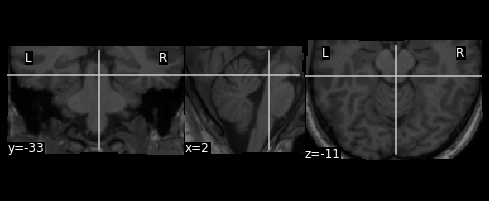

In [3]:
plotting.plot_anat(output_list[0])

### Reslice image with mask 
For cerebellar data analysis, it is good practice to mask the functional images to only retain the cerebellum before any smoothing occurrs. This prevents un-wanted spill-over of neocortical signal into the cerebellum. As a cerebellar mask you can use the mask produced in the [isolation step](LINK TO MATAB TOOBOX DOCUMENT) of the matlab toolbox. 

In [4]:
output_list = reslice.reslice_image(['anatomical_sess-01.nii'], 'y_suitdef.nii', mask = 'c_anatomical_sess-01_pcereb.nii')

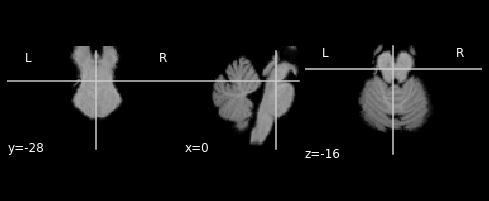

In [5]:
plotting.plot_anat(output_list[0])

### Specific voxel size
By default, the new image will be resliced into the same resolution and bouding box as the deformation map (y_xxx.nii). For functional data we often would like a different resolution. For this, you can simply specify the voxel size. 

In [6]:
output_list = reslice.reslice_image(['anatomical_sess-01.nii'], 'y_suitdef.nii', mask= 'c_anatomical_sess-01_pcereb.nii', voxelsize= (2,2,2))

/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice/SUITPy/reslice.py:115: UserWarning: Both affine matrix and voxel size are specified!
  warnings.warn('Both affine matrix and voxel size are specified!')
/opt/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


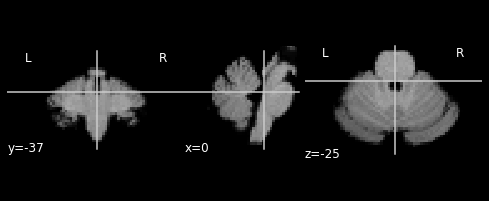

In [7]:
plotting.plot_anat(output_list[0])

In [8]:
# Voxel size has been changed.
output_list[0].affine

array([[  -2.,    0.,    0.,   70.],
       [   0.,    2.,    0., -100.],
       [   0.,    0.,    2.,  -75.],
       [   0.,    0.,    0.,    1.]])

### Specific image size

In [9]:
output_list = reslice.reslice_image(["anatomical_sess-01.nii"], "y_suitdef.nii", "c_anatomical_sess-01_pcereb.nii", 1, None, (50, 50, 50), "Affine_anatomical_sess-01_seg1.mat")

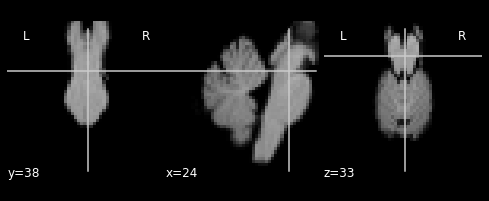

In [10]:
plotting.plot_anat(output_list[0])

In [11]:
# Image shape has been changed
output_list[0].shape

(50, 50, 50)

### Specific image size and voxel size

In [12]:
output_list = reslice.reslice_image(["anatomical_sess-01.nii"], "y_suitdef.nii", "c_anatomical_sess-01_pcereb.nii", 1, (2,3,2), (250, 250, 250), "Affine_anatomical_sess-01_seg1.mat")

/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice/SUITPy/reslice.py:107: UserWarning: Both affine matrix and voxel size are specified!
  warnings.warn('Both affine matrix and voxel size are specified!')


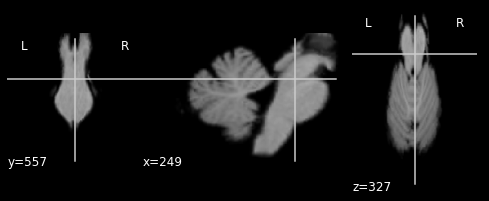

In [13]:
plotting.plot_anat(output_list[0])

In [14]:
# Voxel size has been changed
output_list[0].affine

array([[2., 0., 0., 0.],
       [0., 3., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 1.]])

In [15]:
# Image size has been changed
output_list[0].shape

(250, 250, 250)